## Australia Historical Migration
### Visualisation & Analytic

This is basically some lines of code for generating **`infographics`** and **`analytic`** material on a dataset regarding history of migration to Australia.

---

### Dataset

**`Data From Year 1945 to Year 2017`**  
**`Data Source: Australia Government; Department of Home Affairs`**  
**`Data Released : April 2019`**
[Link to Data](https://www.homeaffairs.gov.au/research-and-statistics/statistics/visa-statistics/live/historical-migration)

Original dataset has been (considerably) wrangled (in spreadsheet software) before being loaded as a pandas dataframe. Considering the fact that this is a historical dataset with world countries, numbers are not straightforward as countries' border have changed during the time. Of many cases to mention is:  
* South & North Korea numbers are reported together in dataset as “Korea S&N”
* Numbers that belong to Soviet Union are added to the Russia
* All data reported as "<5" has been replaced with zero.
* All data that was not allocated to a known country have been ignored. Such as: “other commonwealth countries”, “not stated”, “at sea and not stated”, etc.
* All countries with migration numbers less than 500 over whole period of 73 years have been removed.

Loaded dataset contains about 14,000 piece of data (`185 rows x 76 columns`)

---

### Web Application

The **`flask`** web application [(here)](https://github.com/SAKiiMA/OZiNDEX/tree/master/app) is more of a personal touch and its main functionality is providing a better access to data.  

`matplotlib` code lines in application are a bit different from what you will see in `jupyter notebook`. Using `pyplot` has been avoided not to cause `memory leak` if not implemented properly.


---

### Jupyter Notebook

If just curious to have a look at `visualisation` / `analytic` you may refer to [jupyter notebook “ozimmig.ipynb”](https://github.com/SAKiiMA/OZiNDEX/blob/master/ozimmig.ipynb).





In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.patches import Rectangle

# used with jupyter notebook to generate plots in this very same browser
%matplotlib inline

import json
import folium

In [2]:
# loading data to a DataFrame object
try:
    df = pd.read_excel(
        "ozimmig.xlsx",
        sheet_name="all_by_country_birth",
        header=None,
        index_col=0)
except Exception as e:
    print(e)

In [3]:
# Transpose index & columns
df = df.T

# rename & modifying few column names
df.rename(
    columns={"Continent":"continent", "Region":"region", "Year":"country"},
    inplace=True)

# setting column "country" as index
df.set_index('country', drop=True, inplace=True)




In [4]:
# merging to coluns related to year 1959-60
df["1959–60"] = df[['Jan-Jun 1959', '1959–60']].sum(axis=1).values
df.drop(["Jan-Jun 1959"], axis=1, inplace=True)

In [5]:
# creat a list of just year coloumn names
year_list = df.columns.tolist()[2:]

# adding a new column for total immigrants per country
df["sum"] = df[year_list].sum(axis=1)

# cast a numeric type to all digits (migration numbers)
df[year_list] = df[year_list].apply(pd.to_numeric)

In [6]:
df.head(5)

,continent,region,Oct 1945-Jun 1947,1947–48,1948–49,1949–50,1950–51,1951–52,1952–53,1953–54,...,2009–10,2010–11,2011–12,2012–13,2013–14,2014–15,2015–16,2016–17,2017-18,sum
country,,,,,,,,,,,,,,,,,,,,,
Australia & External Territories,Oceania,Oceania & Antarctica,0,0,0,0,0,0,0,0,...,2289,3113,4113,5582,5292,4869,5668,5425,0.0,76412.0
Cook Islands,Oceania,Oceania & Antarctica,0,0,0,0,0,0,0,0,...,156,236,298,331,250,193,192,92,0.0,5286.0
Fiji,Oceania,Oceania & Antarctica,282,200,190,180,245,196,300,284,...,1755,1651,1819,1656,1641,1278,1195,1035,536.0,71753.0
French Polynesia,Oceania,Oceania & Antarctica,0,0,0,0,0,0,0,0,...,10,14,10,12,8,14,6,9,0.0,408.0
Kiribati,Oceania,Oceania & Antarctica,0,0,0,0,0,0,0,0,...,17,9,6,11,8,21,29,34,5.0,442.0


In [7]:
# statistics
max_mig = df[year_list].sum(axis=0).max()
min_mig = df[year_list].sum(axis=0).min()
total = df['sum'].sum()

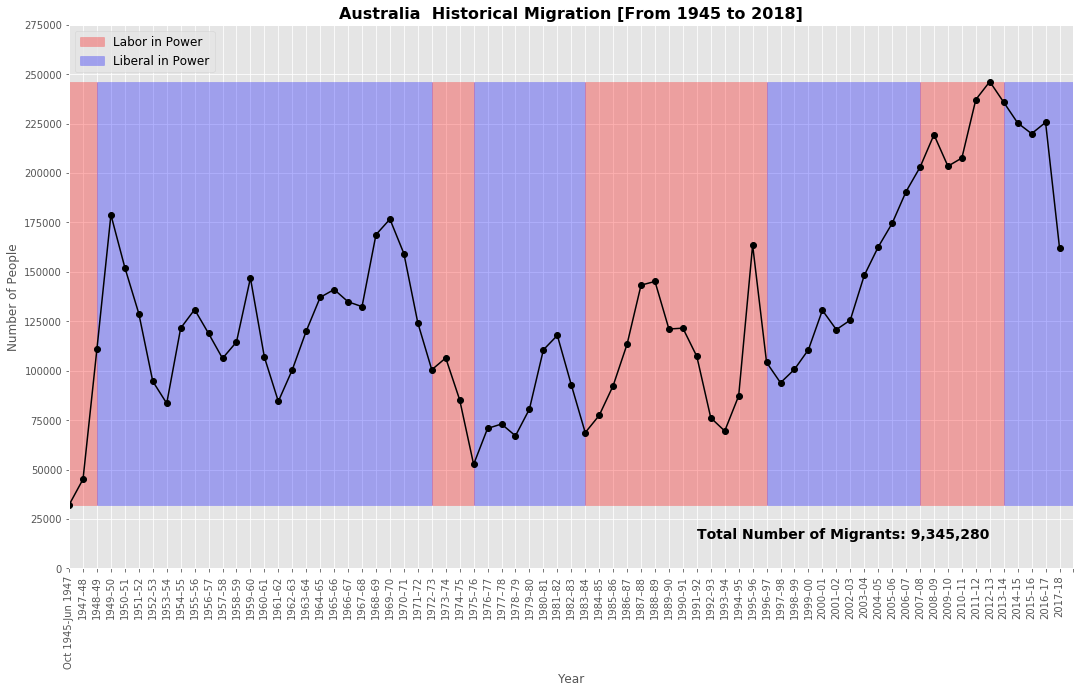

In [8]:
with plt.style.context('ggplot'):
    
    chart = df[year_list].sum().plot(kind='line', figsize=(18, 10), style=('k-o'))
    
    ax = plt.gca()
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of People")
    ax.set_xticks(np.arange(0, 73))
    ax.set_xticklabels(year_list, rotation=90)
    ax.set_yticks(np.arange(0, 300000, 25000))
    ax.set_title(
        "Australia  Historical Migration [From 1945 to 2018]",
        {'fontsize': 16, 'fontweight': 'bold'},
        loc='center'
    )
    
    patch1 = Rectangle((0, min_mig), 2, max_mig-min_mig, color='red', alpha=.3)
    patch2 = Rectangle((2, min_mig), 24, max_mig-min_mig, color='blue', alpha=.3)
    patch3 = Rectangle((26, min_mig), 3, max_mig-min_mig, color='red', alpha=.3)
    patch4 = Rectangle((29, min_mig), 8, max_mig-min_mig, color='blue', alpha=.3)
    patch5 = Rectangle((37, min_mig), 13, max_mig-min_mig, color='red', alpha=.3)
    patch6 = Rectangle((50, min_mig), 11, max_mig-min_mig, color='blue', alpha=.3)
    patch7 = Rectangle((61, min_mig), 6, max_mig-min_mig, color='red', alpha=.3)
    patch8 = Rectangle((67, min_mig), 5, max_mig-min_mig, color='blue', alpha=.3)
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(patch3)
    ax.add_patch(patch4)
    ax.add_patch(patch5)
    ax.add_patch(patch6)
    ax.add_patch(patch7)
    ax.add_patch(patch8)
    
    ax.legend(
        [patch1, patch2],
        ['Labor in Power', 'Liberal in Power'],
        loc='upper left',
        fontsize='large')
    
    ax.annotate(
        "Total Number of Migrants: {:,.0f}".format(total),
        (45, 15000),
        fontsize = 14,
        fontweight = 'bold')
    
plt.show()
plt.close()

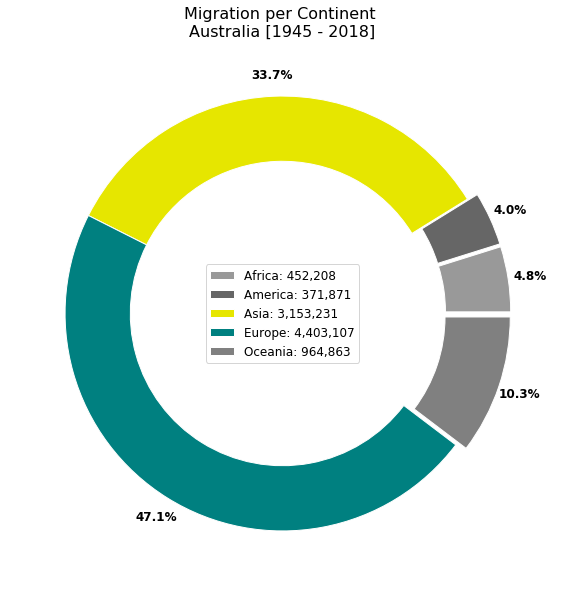

In [9]:
leg_hand = []
for continent in df.groupby('continent').sum().index:
    leg_hand.append("{}: {:,.0f}".format(continent, df.groupby('continent').sum().at[continent, 'sum']))

chart = df.groupby('continent').sum()['sum'].plot(
    kind='pie', 
    subplots=True,
    figsize=(10, 10),
    colors=["#999999", "#666666", "#e6e600", "#008080", "#808080"],
    explode=[.05,.05,0,0,.05],
    autopct="%1.1f%%",
    pctdistance = 1.1,
    wedgeprops  = dict(width=0.3, edgecolor='w'),
    labels = None,
    textprops=dict(size=12, weight='bold')
)

ax = plt.gca()
ax.set_title("Migration per Continent \nAustralia [1945 - 2018]", fontsize=16)
ax.set_ylabel(None)
ax.legend(leg_hand, loc='center', fontsize='large')

plt.show()
plt.close()

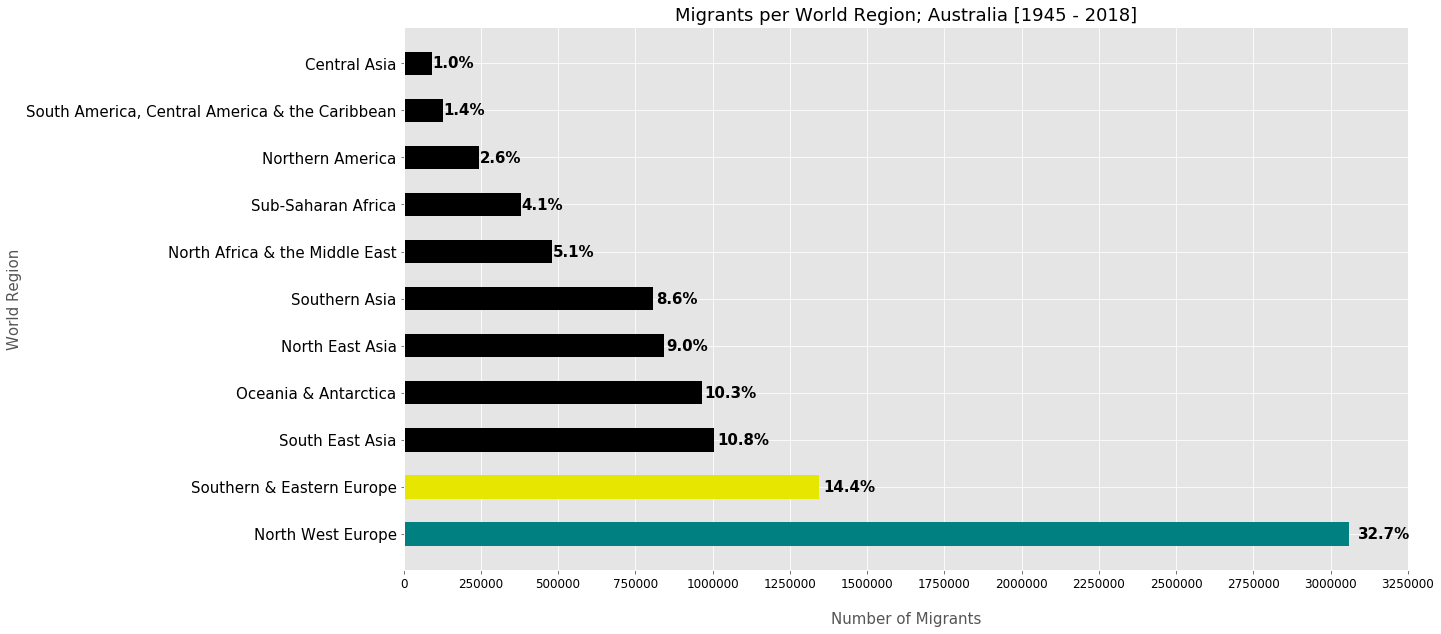

In [10]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(18, 10))
    chart = plt.barh(
        df.groupby('region').sum().sort_values('sum', axis=0, ascending=False).index,
        df.groupby('region').sum().sort_values('sum', axis=0, ascending=False)['sum'],
        height=.5,
        color=["#008080", "#e6e600", 'k', 'k','k','k','k','k','k','k','k'],
    )
    
    plt.yticks(fontsize=15, color='k')
    plt.xticks(fontsize=12, color='k')
    
    ax.set_title("Migrants per World Region; Australia [1945 - 2018]", fontsize=18)
    ax.set_xlabel("\nNumber of Migrants", fontsize=15)
    ax.set_ylabel("World Region", fontsize=15)
    ax.set_xticks(np.arange(0, 3500000, 250000))
    
    for bar in chart.patches:
        plt.text(1.01 * bar.get_width(), bar.get_y() + .3 * bar.get_height(), \
                 '{:.1%}'.format(bar.get_width() / df['sum'].sum()), dict(fontsize=15, fontweight='bold'))
        
    
plt.show()
plt.close()

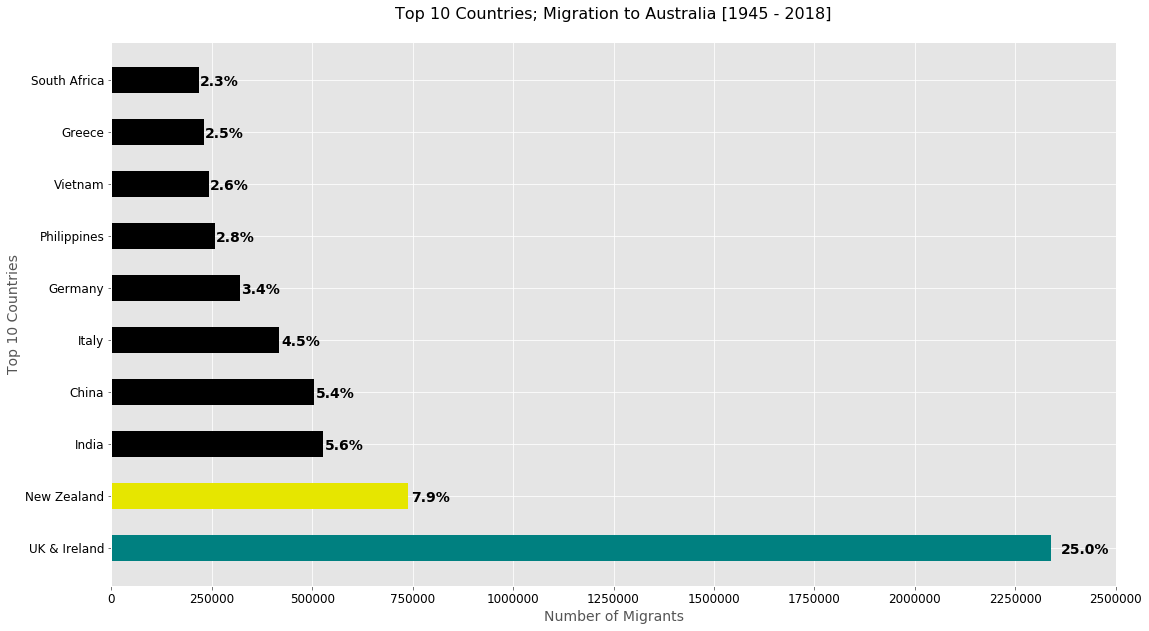

In [11]:
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(figsize=(18, 10))
    
    chart = plt.barh(
        df['sum'].sort_values(ascending=False).head(10).index,
        df['sum'].sort_values(ascending=False).head(10).values,
        height=.5,
        color=["#008080", "#e6e600", 'k', 'k','k','k','k','k','k','k'],
    )
    
    plt.yticks(fontsize=12, color='k')
    plt.xticks(fontsize=12, color='k')
    
    ax.set_title("Top 10 Countries; Migration to Australia [1945 - 2018]\n", dict(fontsize=16))
    ax.set_xlabel("Number of Migrants", fontsize=14)
    ax.set_ylabel("Top 10 Countries", fontsize=14)
    ax.set_xticks(np.arange(0, 2750000, 250000))
    
    for bar in chart.patches:
        ax.text(1.01 * bar.get_width(), bar.get_y() + 0.3 * bar.get_height(), \
                 "{:.1%}".format(bar.get_width() / df['sum'].sum()), dict(fontsize=14, fontweight='bold', color='k'))

plt.show()
plt.close()

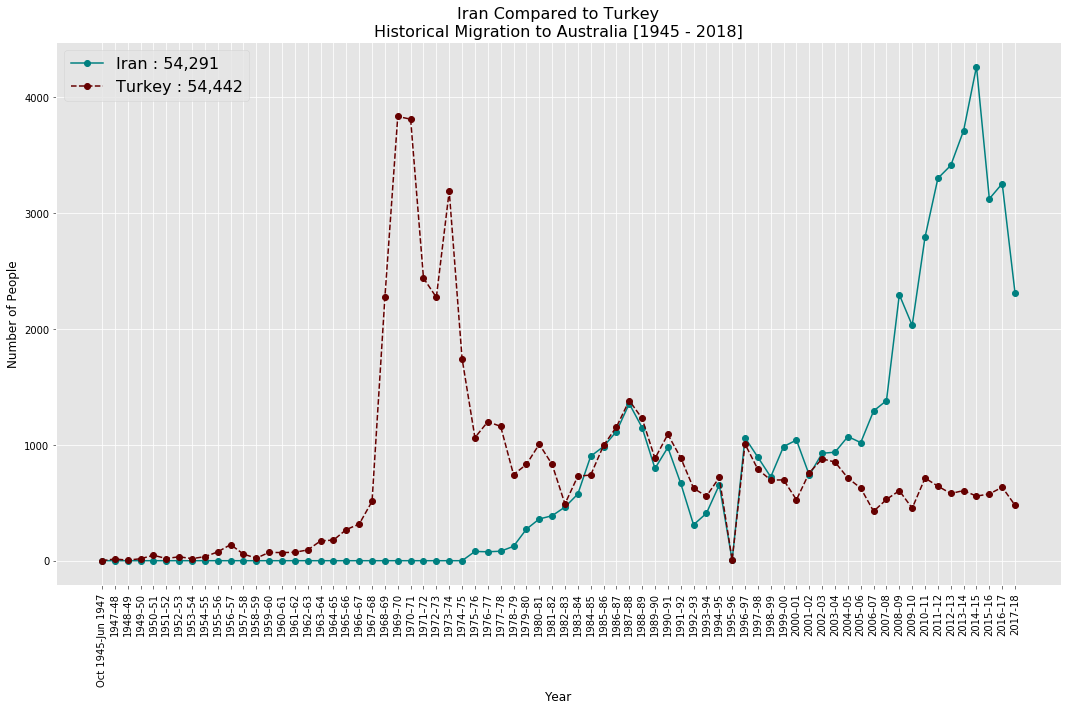

In [12]:
count1 = "Iran"
count2 = "Turkey"
title = count1


with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(figsize=(18, 10))
    
    line1 = plt.plot(
        df.loc[count1, year_list],
        '-o',
        color='#008080',
        label="{} : {:,.0f}".format(count1, df.loc[count1, 'sum']),
    )
    
    if count2:
        line2 = plt.plot(
            df.loc[count2, year_list],
            '--o',
            color='#660000',
            label="{} : {:,.0f}".format(count2, df.loc[count2, 'sum']),
        )
        
        title = title + " Compared to " + count2
        
    ax.legend(loc='upper left', fontsize=16)
    plt.xticks(rotation=90, color='k')
    plt.yticks(color='k')
    ax.set_xlabel("Year", dict(color='k', fontsize=12))
    ax.set_ylabel("Number of People", dict(color='k', fontsize=12))
    plt.title("{}\nHistorical Migration to Australia [1945 - 2018]".format(title), fontsize=16)
    
plt.show()
plt.close()

In [13]:
""" Statistics """

df["sum"].sum() #Total number of migrants over 73 years
"{:,.0f}".format(df["sum"].sum() / 73) # Average number of migrants per year
df["sum"].min() # country with min number of migrants of whole period "chad"
df["sum"].max() # country with max number of migrants of whole period "UK & Ireland"
df[year_list].sum(axis=0).max() # Max number of migrants in a year (2012-2013)
df[year_list].sum(axis=0).min() # Min number of migrants in a year (Oct 1945-Jun 1947)
df[year_list].max().max() # Max number of migrants from a single country in a year (1968-69 UK & Ireland)

80205.0

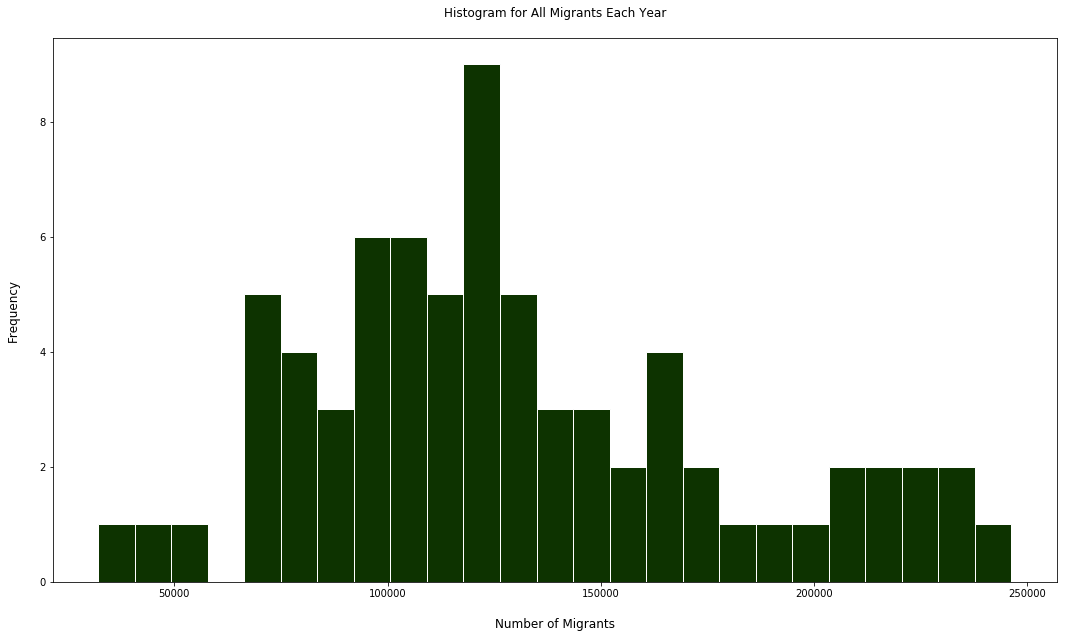

In [14]:
fig, ax = plt.subplots(figsize=(18, 10))

ax.hist(df[year_list].sum(axis=0).values, 25, color="#0d3300", edgecolor="white")

ax.set_title("Histogram for All Migrants Each Year\n", dict(size=12, color='black'))
ax.set_xlabel("\nNumber of Migrants", dict(size=12, color='black'))
ax.set_ylabel("Frequency\n", dict(size=12, color='black'))
ax.tick_params(axis='both', labelsize=10, colors='black')

plt.show()
plt.close()

In [15]:
with open ("world.json") as data:
    wjson = json.load(data)
    
data=df[year_list].sum(axis=1).to_frame().reset_index()
data[0] = data[0] / 1000000

MigMap = folium.Map(location=[30, 10], zoom_start=1.5, tiles='OpenStreetMap')

folium.Choropleth(
    geo_data=wjson, 
    name='choropleth', 
    data=data, #df[year_list].sum(axis=1).to_frame().reset_index(), 
    columns=['country', 0], 
    key_on='feature.properties.name', 
    fill_color='YlOrRd', 
    fill_opacity=0.8, 
    line_opacity=0.2, 
    nan_fill_color='white', 
    nan_fill_opacity=0.3, 
    legend_name='Migration to Australia from 1945 to 2018 (million)', 
    bins=[0, 0.15, 0.3, 0.5, 1, 2.5]
).add_to(MigMap)


MigMap